In [192]:
from kt_utils import *

import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [193]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

Y_train = np.array([np.eye(2)[x[0]] for x in Y_train])
Y_test = np.array([np.eye(2)[x[0]] for x in Y_test])


print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

print(Y_train)

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 2)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 2)
[[1. 0.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [194]:
import matplotlib.pyplot as plt

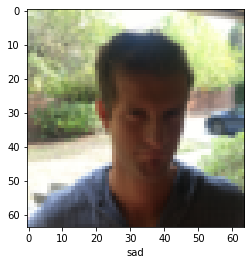

In [195]:
idx = 11

plt.xlabel('happy' if np.argmax(Y_train[idx]) else 'sad')
plt.imshow(X_train[idx])

In [207]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, BatchNormalization, MaxPool2D, Dense



model = Sequential([
    Conv2D(kernel_size=(3,3), input_shape=(64,64,3), filters=8, padding='same', strides=(1,1), activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(kernel_size=(5,5), filters=16, padding='same', strides=(1,1), activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 64, 64, 8)         224       
_________________________________________________________________
batch_normalization_40 (Batc (None, 64, 64, 8)         32        
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 32, 32, 16)        3216      
_________________________________________________________________
batch_normalization_41 (Batc (None, 32, 32, 16)        64        
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
flatten_20 (Flatten)         (None, 4096)            

In [208]:
model.compile(optimizer = "Adam", loss = "binary_crossentropy", 
              metrics = ['accuracy'])

# test_ds = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).batch(50)
# train_ds = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(16).shuffle(1000)

In [217]:
model.fit(X_train, Y_train, batch_size=10, epochs=20)

Train on 600 samples
Epoch 1/20
600/600 [==============================] - 1s 2ms/sample - loss: 0.0216 - accuracy: 0.9917
Epoch 2/20
600/600 [==============================] - 1s 2ms/sample - loss: 0.0210 - accuracy: 0.9933
Epoch 3/20
600/600 [==============================] - 1s 2ms/sample - loss: 0.0123 - accuracy: 0.9967
Epoch 4/20
600/600 [==============================] - 1s 2ms/sample - loss: 0.0192 - accuracy: 0.9933
Epoch 5/20
600/600 [==============================] - 1s 2ms/sample - loss: 0.0250 - accuracy: 0.9900
Epoch 6/20
600/600 [==============================] - 1s 2ms/sample - loss: 0.0107 - accuracy: 0.9967
Epoch 7/20
600/600 [==============================] - 1s 2ms/sample - loss: 0.0163 - accuracy: 0.9983
Epoch 8/20
600/600 [==============================] - 1s 2ms/sample - loss: 0.0546 - accuracy: 0.9783
Epoch 9/20
600/600 [==============================] - 1s 2ms/sample - loss: 0.1934 - accuracy: 0.9450
Epoch 10/20
600/600 [==============================] - 1s 2ms

In [218]:
model.evaluate(X_test, Y_test)

150/150 [==============================] - 0s 434us/sample - loss: 0.1189 - accuracy: 0.9600


[0.11890904431541761, 0.96]

In [227]:
res = model.predict(X_test)
res = np.array([np.eye(2)[x] for x in np.argmax(res, axis=1)])


acc = tf.keras.metrics.Accuracy()
tp = tf.keras.metrics.TruePositives()
tn = tf.keras.metrics.TrueNegatives()
fp = tf.keras.metrics.FalsePositives()
fn = tf.keras.metrics.FalseNegatives()

acc(res, Y_test)

tp(res, Y_test)
fp(res, Y_test)

print('accuracy={}'.format(acc.result()))
print("tp={}, fp={},".format(tp.result(), fp.result()))

tp.reset_states()
fp.reset_states()
tn.reset_states()
fn.reset_states()
acc.reset_states()

tn(res, Y_test)
fn(res, Y_test)

print("tn={}, fn={},".format(tn.result(), fn.result()))




accuracy=0.9599999785423279
tp=144.0, fp=6.0,
tn=144.0, fn=6.0,


# NOTES

#### accuracy might be bad because you are outputing float numbers not integers
#### If you got float32/64 errors might be for numpy/tensor incompatibilities

well I DONT KNOW why metrics dont work and they result in same numbers!

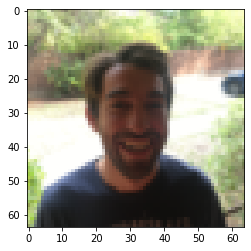

In [268]:

# some of wrong guesses!

wrongs = (np.argmax(res, axis=1) != np.argmax(Y_test, axis=1))


plt.imshow(X_test[wrongs][4])